In [14]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [15]:
data=pd.read_csv("cardio_train.csv")
print(data)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [16]:
data=data.drop_duplicates()
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
data=data.drop(['id','active'],axis=1)
data.age=round(data.age/365)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,1


In [18]:
data['BMI']=data['weight']/((data.height/100)**2)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
0,50.0,2,168,62.0,110,80,1,1,0,0,0,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,1,23.507805
3,48.0,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,0,26.927438
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,50.472681
69997,52.0,2,183,105.0,180,90,3,1,0,1,1,31.353579
69998,61.0,1,163,72.0,135,80,1,2,0,0,1,27.099251


<AxesSubplot:>

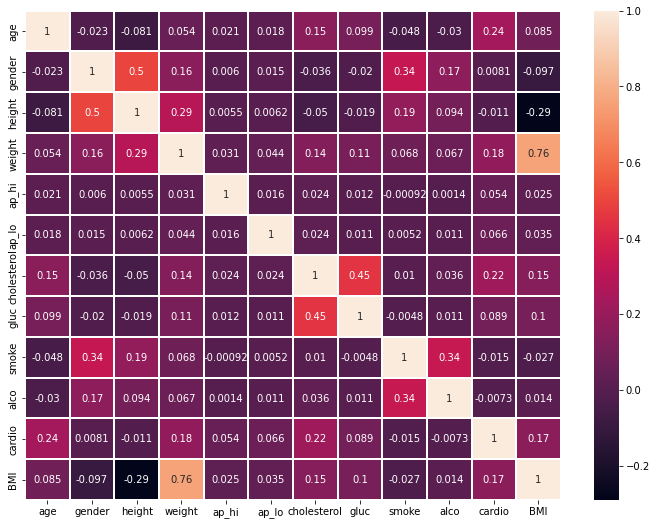

In [19]:
cm=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,linewidths=2)

In [20]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.499700,27.556513
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.500003,6.091511
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.374068
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.222222
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.666667


In [21]:
data=data[data['ap_lo']>0]
data=data[data['ap_hi']<250]
data=data[data['ap_hi']>60]
data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

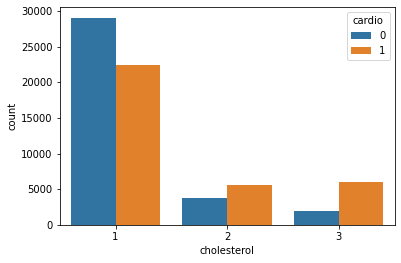

In [22]:
sns.countplot(data.cholesterol,hue=data.cardio)

In [23]:
upper_limit= data.weight.mean() + 2*data.weight.std()
print(upper_limit)
lower_limit= data.weight.mean() - 2*data.weight.std()
lower_limit

102.78225468596331


45.47930259440248

In [24]:
data=data[data['weight']<upper_limit] 
data=data[data['weight']>lower_limit]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
count,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000
mean,53.329397,1.346285,164.272906,72.705122,126.259908,81.206911,1.354249,1.218566,0.086743,0.052220,0.488299,27.039223
std,6.762154,0.475789,8.023614,11.684446,16.429007,9.357428,0.671184,0.564659,0.281460,0.222471,0.499867,5.047929
min,30.000000,1.000000,55.000000,46.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,13.760000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.833005
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.142688
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,29.687500
max,65.000000,2.000000,250.000000,102.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,267.768595


In [25]:
upper_limit= data.height.mean() + 2*data.height.std()
print('upper limit: ',upper_limit)
lower_limit= data.height.mean() - 2*data.height.std()
print('Lower limit: ',lower_limit)

data=data[data['height']<upper_limit]
data=data[data['height']>lower_limit]

upper limit:  180.32013502364015
Lower limit:  148.22567733333926


In [26]:
upper_limit= data.ap_hi.mean() + 3*data.ap_hi.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_hi.mean() - 3*data.ap_hi.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_hi']<upper_limit]
data=data[data['ap_hi']>lower_limit]

upper limit:  175.38118514996137
Lower limit:  77.03762946609105


In [27]:
upper_limit= data.ap_lo.mean() + 3*data.ap_lo.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_lo.mean() - 3*data.ap_lo.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

upper limit:  108.0428134621664
Lower limit:  53.85359948062596


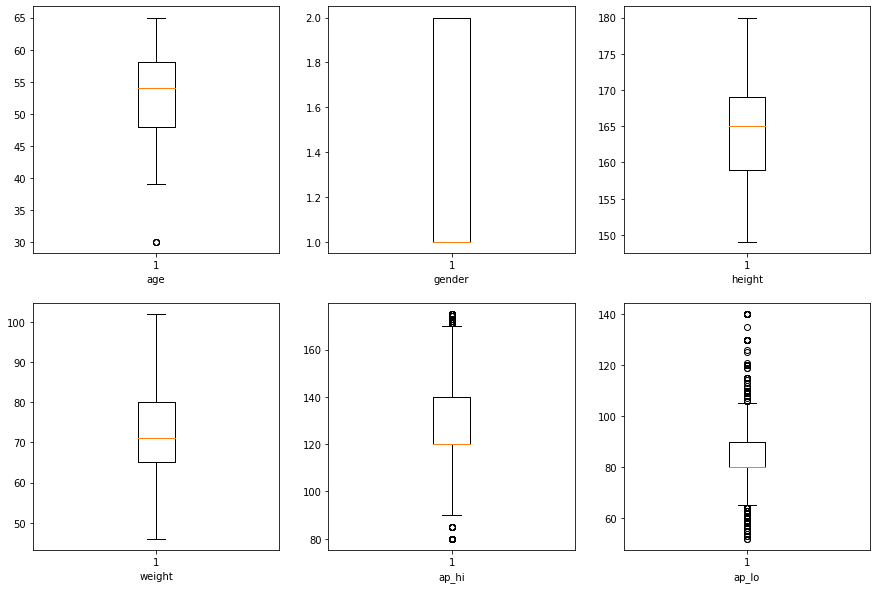

In [28]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col[i]])
    plt.xlabel(col[i])

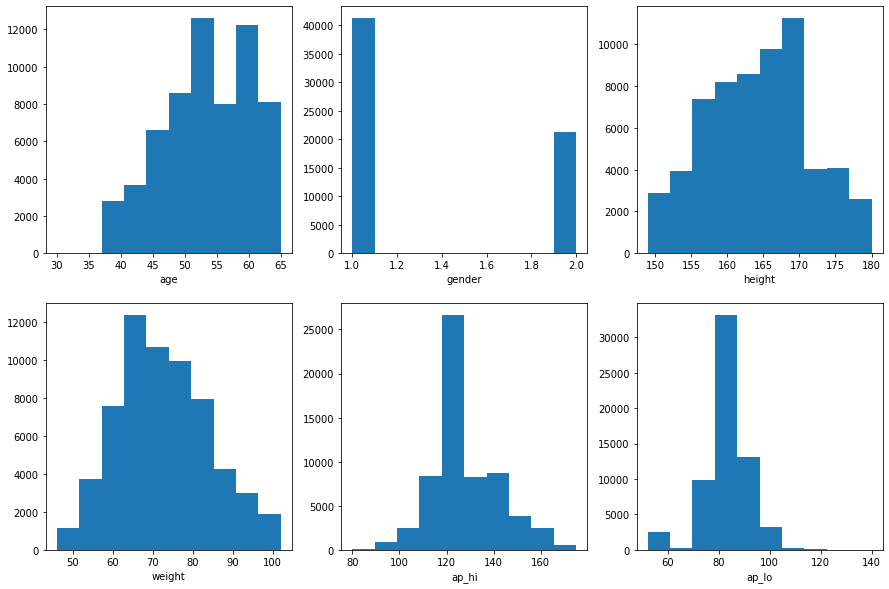

In [29]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.hist(data[col[i]])
    plt.xlabel(col[i])

In [30]:
y=data.cardio
x=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco']]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=True)

In [32]:
lgr=LogisticRegression(solver='newton-cg').fit(x_train,y_train)
print('Accuracy of Logistic Regression:',accuracy_score(y_test,lgr.predict(x_test)))

Accuracy of Logistic Regression: 0.7271935343367372


In [33]:
print('Classification Report:\n',classification_report(y_test,lgr.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     10788
           1       0.75      0.65      0.69      9875

    accuracy                           0.73     20663
   macro avg       0.73      0.72      0.72     20663
weighted avg       0.73      0.73      0.73     20663



In [34]:
model=GradientBoostingClassifier().fit(x_train,y_train)
pred=model.predict(x_test)

In [35]:
print('Accuracy of GradientBoostingClassifier:',accuracy_score(y_test,pred))

Accuracy of GradientBoostingClassifier: 0.7316459371824033


In [36]:
print('Classification Report:\n',classification_report(y_test,pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     10788
           1       0.74      0.67      0.70      9875

    accuracy                           0.73     20663
   macro avg       0.73      0.73      0.73     20663
weighted avg       0.73      0.73      0.73     20663



In [37]:
rfc = RandomForestClassifier(random_state=True)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=True)

In [38]:
print('Accuracy of random forrest classifier:',accuracy_score(y_test,rfc.predict(x_test)))


Accuracy of random forrest classifier: 0.6969946280791753


In [39]:
print('Classification Report:\n',classification_report(y_test,rfc.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71     10788
           1       0.69      0.67      0.68      9875

    accuracy                           0.70     20663
   macro avg       0.70      0.70      0.70     20663
weighted avg       0.70      0.70      0.70     20663



In [40]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [41]:
import joblib
filename = 'Healthcare.joblib'
joblib.dump(model, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7316459371824033
